In [ ]:
import pandas as pd

In [ ]:
!git clone https://github.com/Keerthiga2005-S/ML--Projects.git

fatal: destination path 'ML--Projects' already exists and is not an empty directory.


In [ ]:
d=pd.read_csv("/content/startup-2 - startup-2.csv")

In [ ]:
d.head()

,Unnamed: 0,R&D Spend,Administration,Marketing Spend,State,Profit
0,0,165349.20,136897.80,471784.10,New York,192261.83
1,1,162597.70,151377.59,443898.53,California,191792.06
2,2,NaN,NaN,407934.54,Florida,191050.39
3,3,144372.41,118671.85,383199.62,New York,182901.99
4,4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
d=d.iloc[:,1:]
d.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,NaN,NaN,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
d.isna().sum()

R&D Spend          4
Administration     4
Marketing Spend    0
State              3
Profit             3
dtype: int64

In [ ]:
d['R&D Spend']=d['R&D Spend'].fillna(d['R&D Spend'].mean())

In [ ]:
d['Administration']=d['Administration'].fillna(d['Administration'].mean())

In [ ]:
d['Profit']=d['Profit'].fillna(d['Profit'].mean())

In [ ]:
d.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              3
Profit             0
dtype: int64

In [ ]:
d=d.drop('State',axis=1) #or d=d.loc[:,['']]

In [ ]:
d.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'Profit'], dtype='object')

In [ ]:
d.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.251992,0.683020,0.921165
Administration,0.251992,1.000000,-0.024989,0.208506
Marketing Spend,0.683020,-0.024989,1.000000,0.748876
Profit,0.921165,0.208506,0.748876,1.000000


<Axes: >

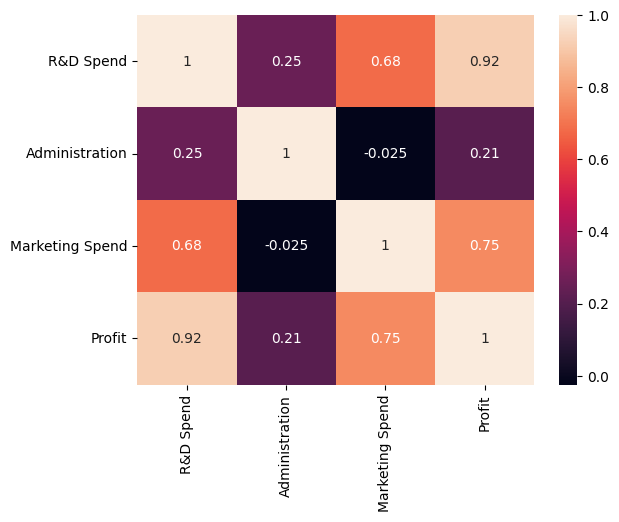

In [ ]:
import seaborn as sns
sns.heatmap(d.corr(),annot=True)

In [ ]:
d=d.drop('Administration',axis=1)
x=d.iloc[:,:-1]
y=d.iloc[:,-1]

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [ ]:
from sklearn.linear_model import LinearRegression
rg=LinearRegression()
rg.fit(x_train,y_train)


LinearRegression()

In [ ]:
rg.coef_

array([0.71298341, 0.05872445])

In [ ]:
rg.intercept_

48955.80767286716

In [ ]:
ypred_train=rg.predict(x_train)
#profit=m1*rd+m2*rd+m3*market+c

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error
r2_score(y_train,ypred_train)   #Training

0.9218824883146962

In [ ]:
mean_squared_error(y_train,ypred_train)

118995929.21182637

In [ ]:
ypred_test=rg.predict(x_test)
#profit=m1*rd+m2*rd+m3*market+c

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error
r2_score(y_test,ypred_test)  #Testing

0.750633644174589

In [ ]:
mean_squared_error(y_test,ypred_test)

395520280.19714427

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
x1_range=np.linspace(min(x.iloc[:,0]),max(x.iloc[:,0]),10)
x2_range=np.linspace(min(x.iloc[:,1]),max(x.iloc[:,1]),10)
x1_grid,x2_grid=np.meshgrid(x1_range,x2_range)
y_grid=rg.predict(np.c_[x1_grid.ravel(),x2_grid.ravel()]).reshape(x1_grid.shape)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Text(0.5, 0.92, 'Multiple Linear Regression 717822I226')

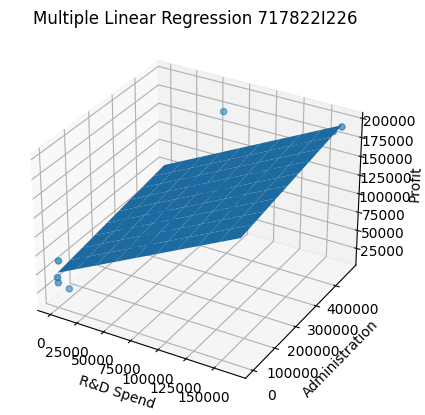

In [ ]:
fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')
ax.scatter(x.iloc[:,0],x.iloc[:,1],y)
ax.plot_surface(x1_grid,x2_grid,y_grid)
ax.set_xlabel('R&D Spend')
ax.set_ylabel('Administration')
ax.set_zlabel('Profit')
ax.set_title('Multiple Linear Regression 717822I226')


